# Problem Statement: To build ML model for Flight Fare Prediction

In [2]:
## Importing libraries

## Reading the data
import numpy as np
import pandas as pd

## Visualization of the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Profile Report
from pandas_profiling import ProfileReport

## Back up of Standard data
import pickle as pkl

## Splitting the data into Train and Test 
from sklearn.model_selection import train_test_split

## importing libraries for Model Building and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor

##  importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
## Data Importing

# Train Data

In [4]:
## Reading the dataset. The dataset is in excel
data_train=pd.read_excel("C:/Users/nawin/airfare/Data_Train.xlsx")

In [5]:
## Printing the name of attributes
print("The name of columns are:", data_train.columns)

The name of columns are: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [6]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_train.shape)

The number of rows and columns are: (10683, 11)


In [7]:
## Displaying the first 5 rows of dataset
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Attribute Nomenclature and Information

In [9]:
## Information on dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
## Profile Report 
profile = ProfileReport(data_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
## Displaying Statistical analysis of "Price" attribute
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [12]:
## Printing count of unique numbers
data_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [13]:
## Checking Null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
# Visualization

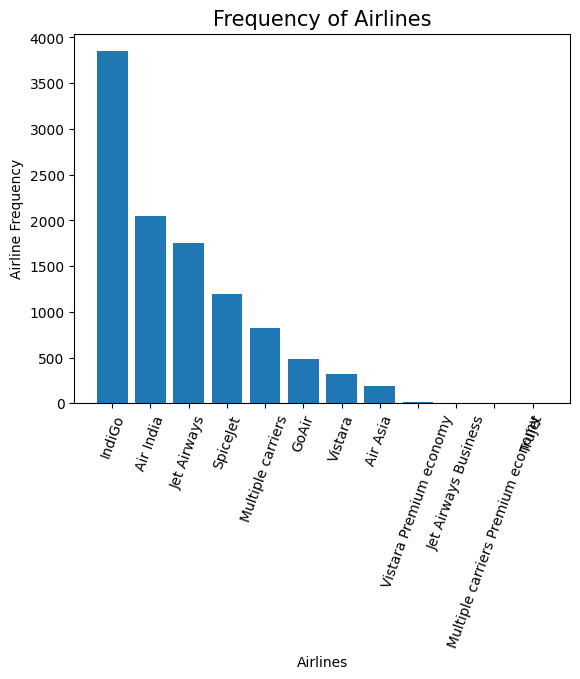

In [15]:
# Ploting graph of airline bookings to visually represent the bookings count.
plt.bar(data_train.Airline.unique(), data_train.Airline.value_counts())
plt.title("Frequency of Airlines", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Airline Frequency")
plt.xticks(rotation=70)
plt.show()

<AxesSubplot: title={'center': 'Distribution of Price'}, xlabel='Price', ylabel='Density'>

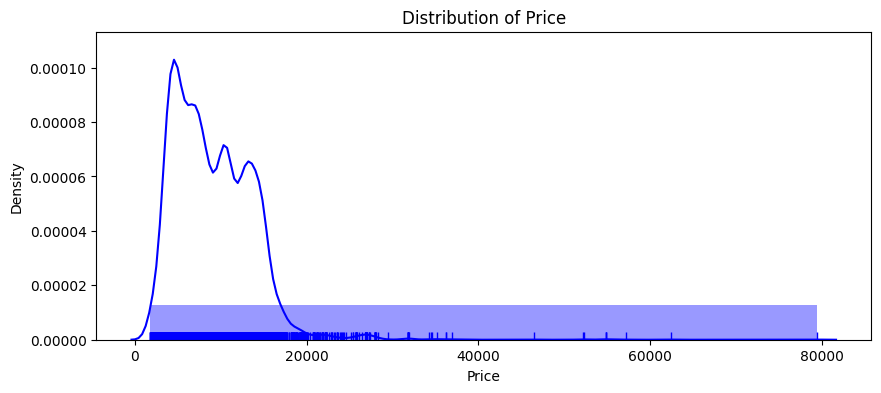

In [16]:
## Checking distribution of "Price" Feature 
plt.figure(figsize=(10,4))
plt.title('Distribution of Price')
sns.distplot(data_train['Price'],bins=1, rug=True, color='blue')

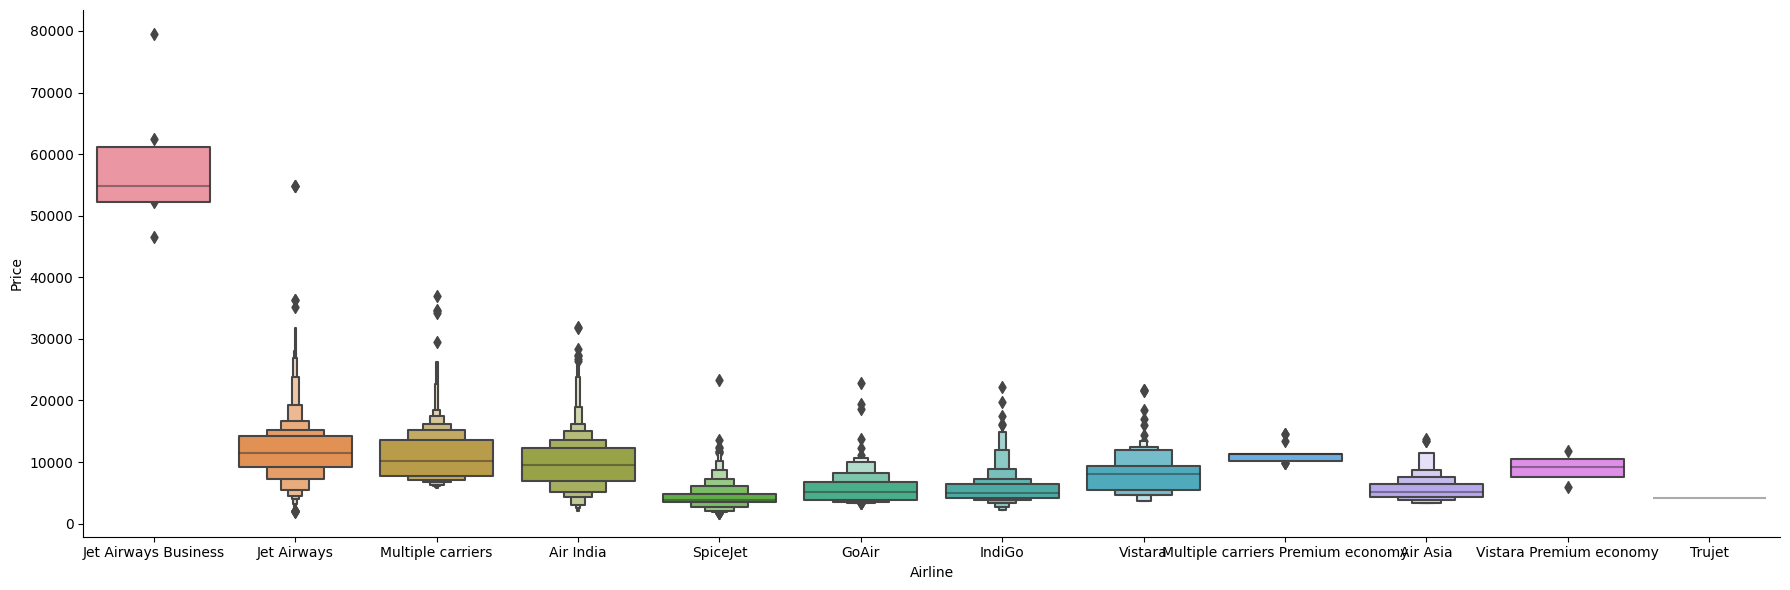

In [17]:
##   Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##  From graph we can see that Jet Airways Business have the highest Price.

In [18]:
## Number of Stops
stops = data_train['Total_Stops'].unique()
print("Number of stops\n", stops)

Number of stops
 ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


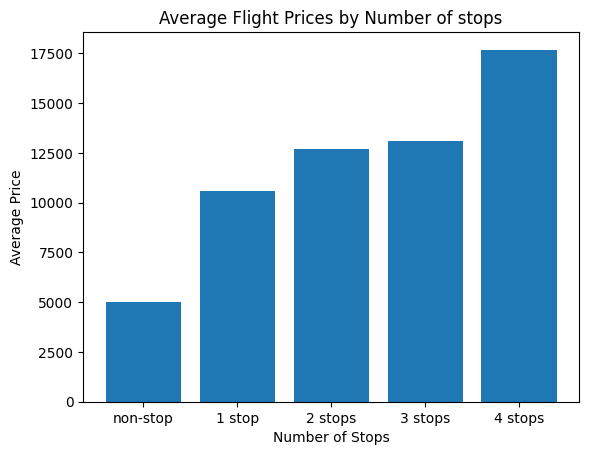

In [19]:
## Average Flight Prices by Number of stops
stops = data_train.groupby('Total_Stops')['Price'].mean().round(0).sort_values(ascending= True)
plt.bar(stops.index, stops.values)
plt.title("Average Flight Prices by Number of stops")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.show()

In [20]:
# Feature Engineering

In [21]:
## As there are two null values, we drop them
data_train.dropna(inplace = True)

In [22]:
## Checking Null values after dropping them
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [23]:
## Extraction

# Extracting Departure hour from Departure Time
data_train["Depart_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

# Extracting Departure minutes from Departure Time
data_train["Depart_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

# Extracting Arrival hour from Arrival Time
data_train["Arrival_hour"] = pd.to_datetime(data_train["Arrival_Time"]).dt.hour

# Extracting Departure minutes from Departure Time
data_train["Arrival_min"] = pd.to_datetime(data_train["Arrival_Time"]).dt.hour

# Extracting day of Date_of_Journey
data_train["Day_of_Journey"] = pd.to_datetime(data_train["Date_of_Journey"], format="%d/%m/%Y").dt.day

# Extracting Month of Date_of_Journey
data_train["Month_of_Journey"] = pd.to_datetime(data_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [24]:
##Dropping the attributes

##  Hour and min are extracted from Dep_Time, so we drop the attribute "Dep_Time"
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [25]:
## Displaying attributes
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,13,13,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,4,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,18,23,23,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,16,21,21,1,3


In [26]:
# Duration is differnce between Departure Time and Arrival Time

# Converting "Duration" into list and mins and adding "0m" and "0h", if required
duration =list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extracting hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    #  Extracting only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [27]:
## Adding duration_hours and duration_mins list to data dataframe

data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins

In [28]:
data_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=data_train[['Airline']]
Airline=pd.get_dummies(Airline,  drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=data_train[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=data_train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
data_train=pd.concat([data_train, Airline, Source, Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,16,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data_train["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [36]:
data_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
data_train["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [38]:
data_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,22,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,18,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,16,16,...,0,0,0,0,0,0,0,0,0,1


In [41]:
## Dropping attribute Duration
data_train.drop(["Duration"], axis = 1, inplace = True)

## As many are no info,we drop it, additional info attribute
data_train.drop(["Additional_Info"], axis = 1, inplace = True)

## As Total_Stops and Route are related, we drop Route Attribute
data_train.drop(["Route"], axis = 1, inplace = True)

data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [42]:
## Printing the name of attributes
print("The name of columns are:", data_train.columns)

The name of columns are: Index(['Total_Stops', 'Price', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [43]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_train.shape)

The number of rows and columns are: (10682, 30)


# Test Data

In [44]:
## Data Egestion
data_test = pd.read_excel(r"C:/Users/nawin/air_Testset.xlsx")

In [45]:
## printing first 5 rows
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
##  Listing the names of columns
data_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [47]:
## Information on dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
## Checking Null values
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
## Extraction

## Extracting Departure hour from Departure Time
data_test["Depart_hour"] = pd.to_datetime(data_test["Dep_Time"]).dt.hour
## Extracting Departure min from Departure Time
data_test["Depart_min"] = pd.to_datetime(data_test["Dep_Time"]).dt.minute

## Extracting Arrival hour from Arrival Time
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour
## Extracting Arrival min from Arrival Time
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute

## Extracting day of Date_of_Journey
data_test["Day_of_Journey"] = pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day
## Extracting day of Date_of_Journey
data_test["Month_of_Journey"] = pd.to_datetime(data_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [50]:
## Dropping the attributes

##  Hour and min are extracted from Dep_Time, so we drop the attribute "Dep_Time"
data_test.drop(["Dep_Time"], axis = 1, inplace = True)

##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)

##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [51]:
# Duration is differnce between Departure Time and Arrival Time

# Converting "Duration" into list and mins and adding "0m" and "0h", if required
duration =list(data_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extracting hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    #  Extracting only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [52]:
## Adding duration_hours and duration_mins list to data dataframe

data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins

Encoding of Categorical Data Attributes

In [53]:
## Encoding of Categorical Data Attributes

data_test['Airline'].value_counts()
Airline = pd.get_dummies(data_test["Airline"], drop_first= True)


data_test['Source'].value_counts()
Source = pd.get_dummies(data_test["Source"], drop_first= True)

data_test['Destination'].value_counts()
Destination = pd.get_dummies(data_test["Destination"], drop_first = True)

In [54]:
data_test["Additional_Info"]

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

In [55]:
data_test["Route"]

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2671, dtype: object

In [56]:
data_test["Total_Stops"]

0         1 stop
1         1 stop
2         1 stop
3         1 stop
4       non-stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 2671, dtype: object

In [57]:
data_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [58]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [59]:
## As many are no info,we drop it, additional info attribute
data_test.drop(["Additional_Info"], axis = 1, inplace = True)

## As Total_Stops and Route are related, we drop Route Attribute

data_test.drop(["Route"], axis = 1, inplace = True)

## Dropping attributes Airline, Source, Destination
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [60]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_test.shape)

The number of rows and columns are: (2671, 10)


In [61]:
## Printing the name of attributes
print("The name of columns are:", data_test.columns)

The name of columns are: Index(['Duration', 'Total_Stops', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins'],
      dtype='object')


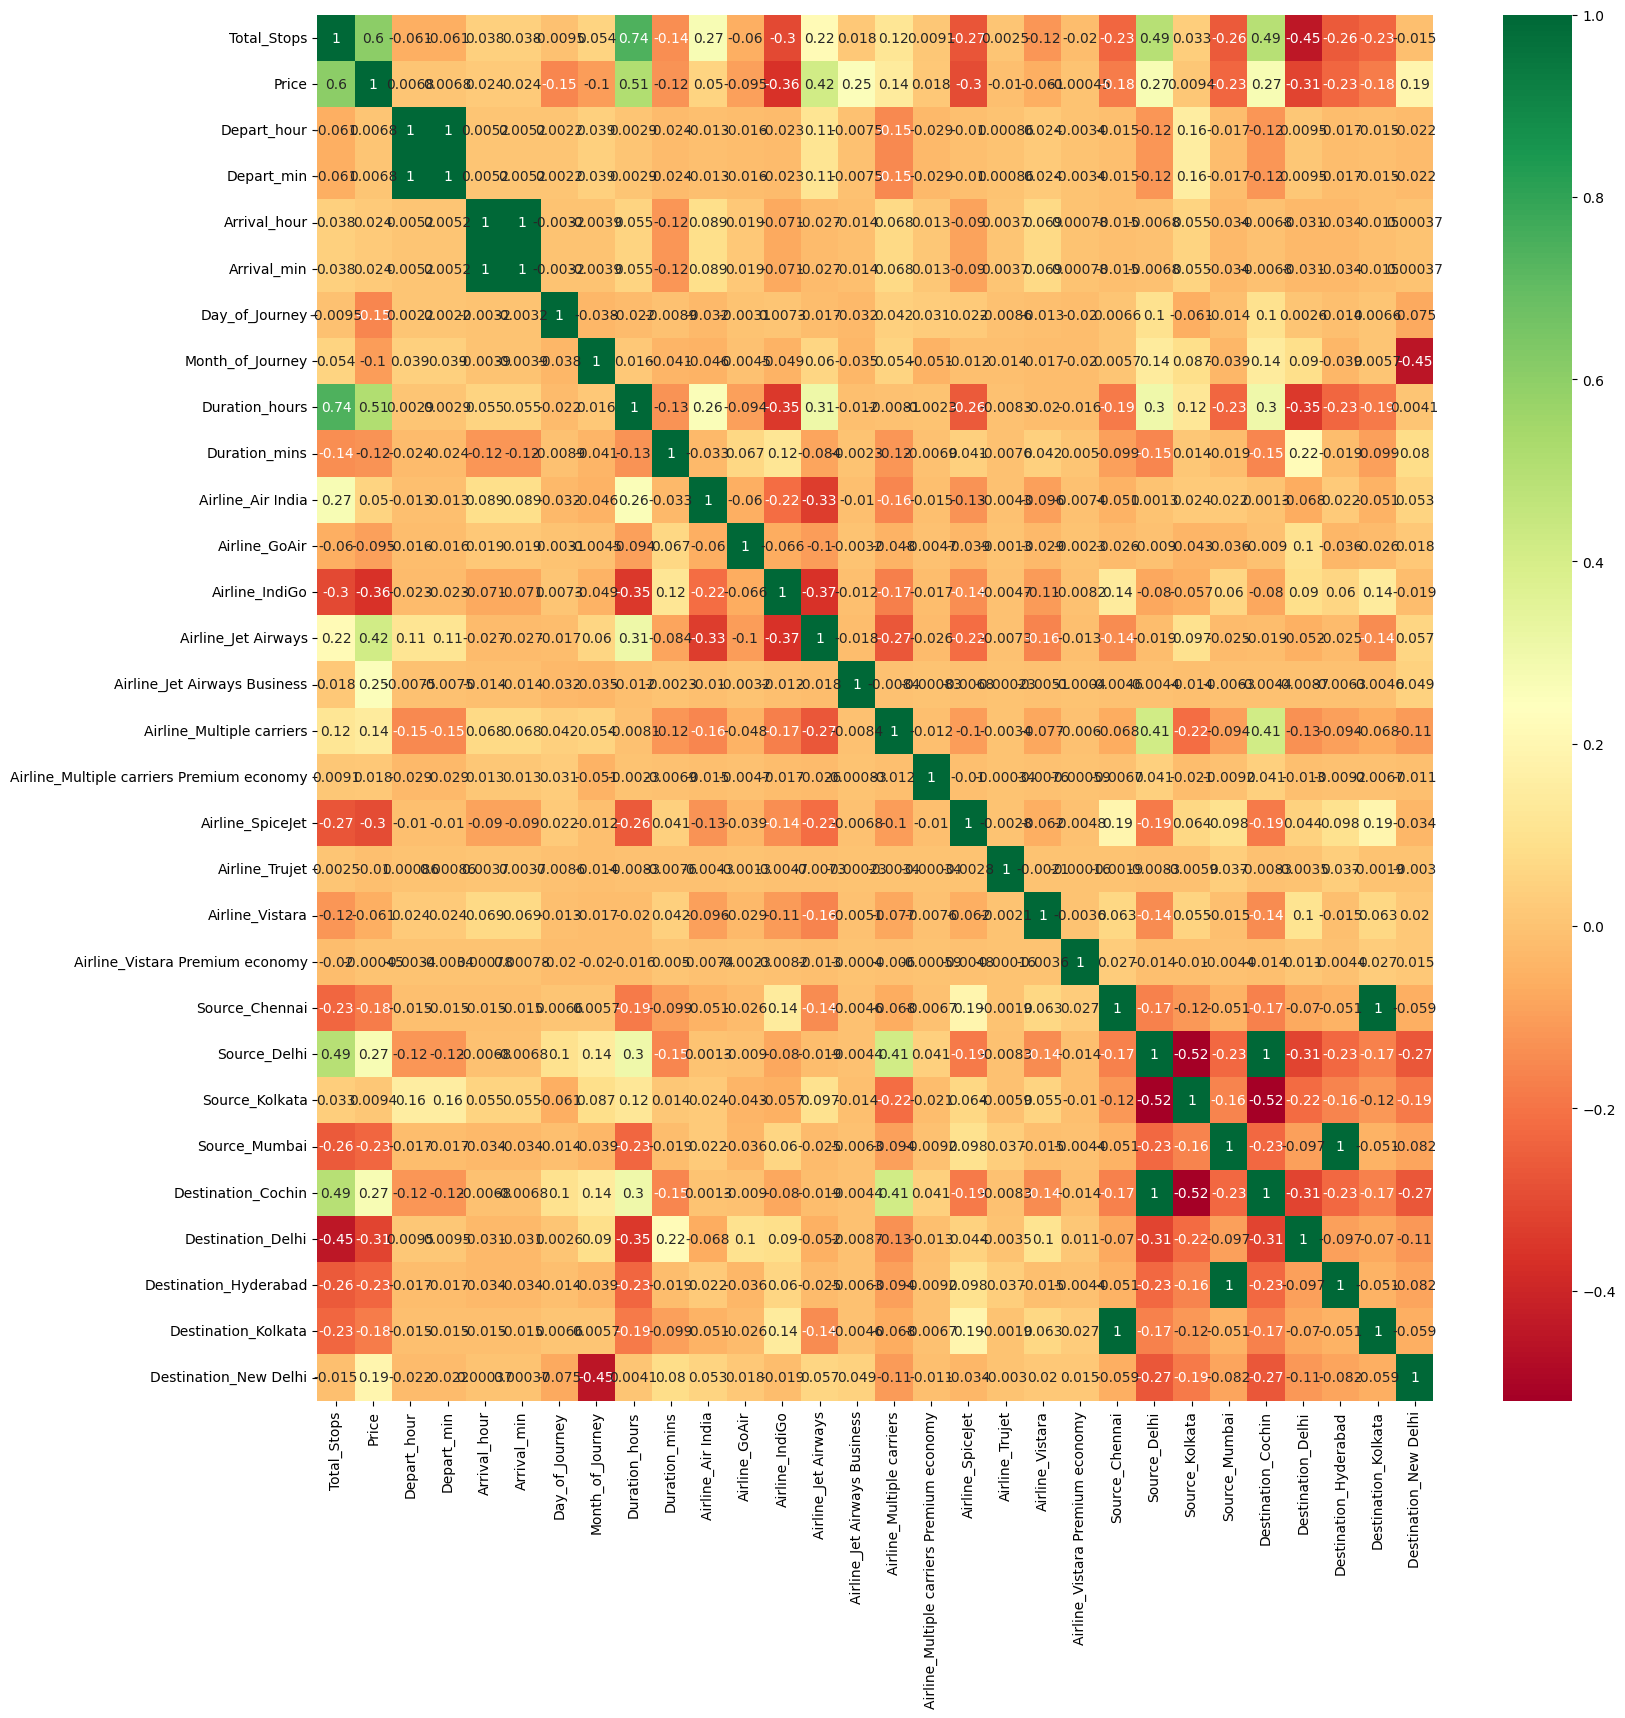

In [62]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

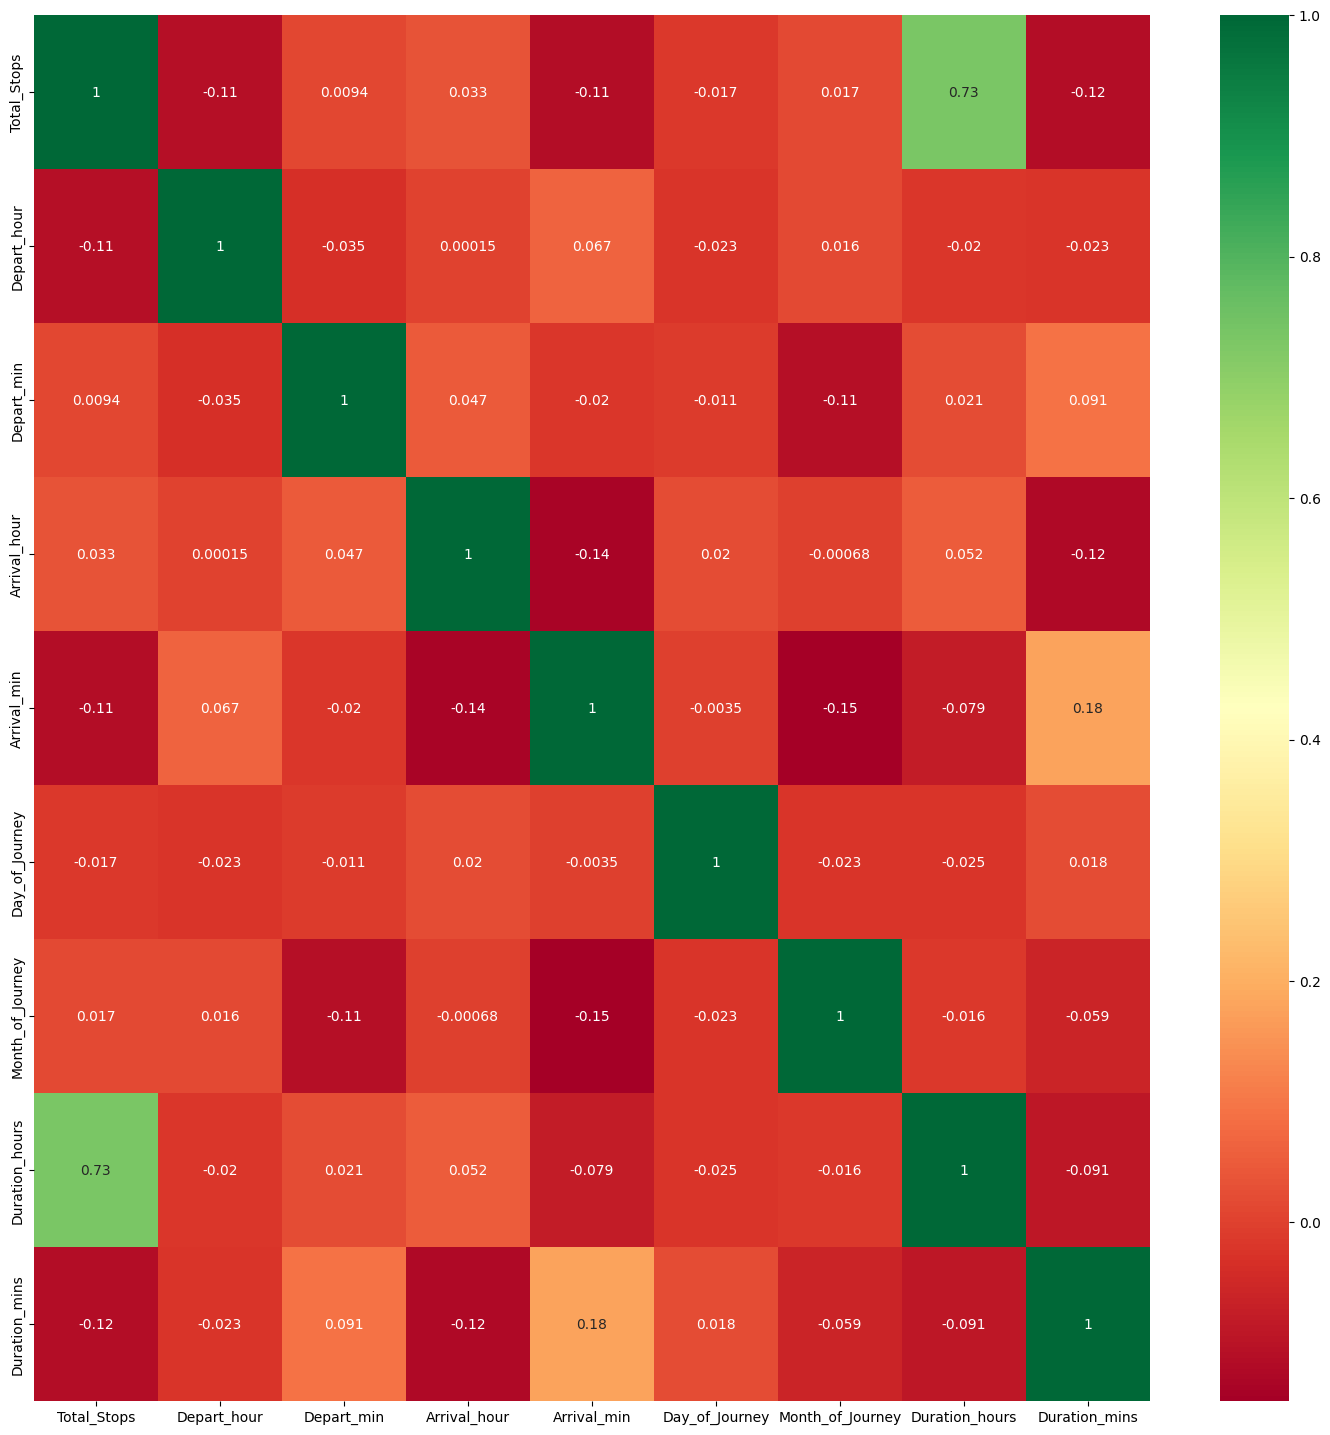

In [63]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_test.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [64]:
## creating independent feacture
X=data_train.drop('Price',axis=1)

## Printing the name of attributes
print("The name of columns are:", X.columns)

The name of columns are: Index(['Total_Stops', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [65]:
## dependent feature
y=data_train['Price']

## Displaying the rows
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [66]:
## Model Training
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [67]:
## printing counts
print(f"X_train is {len(X_train)}, y_train is {len(y_train)}")

X_train is 8545, y_train is 8545


In [68]:
## printing counts
print(f"X_test is {len(X_test)}, y_test is {len(y_test)}")

X_test is 2137, y_test is 2137


In [69]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [70]:
print(selection.feature_importances_)

[2.29516460e-01 1.90468910e-02 1.80148603e-02 2.22218058e-02
 2.22312713e-02 1.44709924e-01 5.48794058e-02 1.19976470e-01
 2.62451291e-02 9.86910597e-03 1.95814972e-03 1.79281184e-02
 1.38546156e-01 6.78646714e-02 1.86037462e-02 8.67980302e-04
 3.30876327e-03 1.48258647e-04 5.13195361e-03 7.63095479e-05
 4.01216908e-04 9.31808163e-03 3.30840586e-03 6.08028873e-03
 1.20798119e-02 1.48622370e-02 7.71331517e-03 4.41574229e-04
 2.46496373e-02]


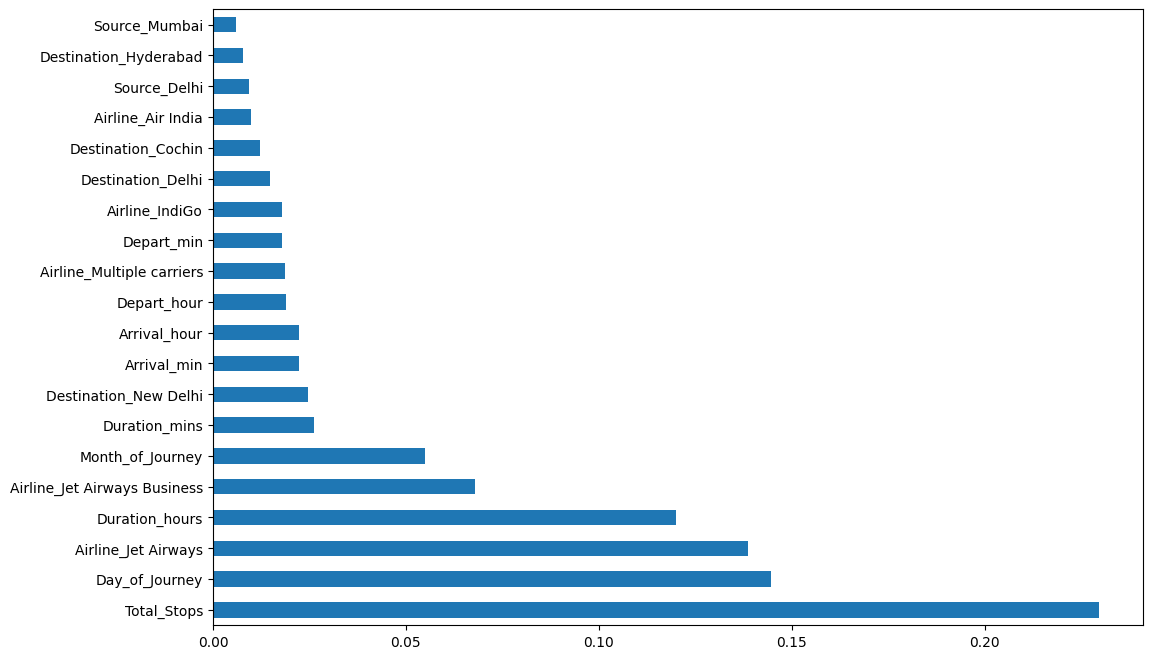

In [71]:
## plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [72]:
## Printing the number of rows and columns

print("The number of rows and columns in X_train: ",X_train.shape)
print("The number of rows and columns in X_test: ",X_test.shape)
print("The number rows in y_train: ",y_train.shape)
print("The number of rows  in y_test: ",y_test.shape)

The number of rows and columns in X_train:  (8545, 29)
The number of rows and columns in X_test:  (2137, 29)
The number rows in y_train:  (8545,)
The number of rows  in y_test:  (2137,)


In [73]:
## Defining Function model_metrics 

def model_metrics(model):
    print(f'Training Data score {model.score(X_train, y_train)}')
    print(f'Testing Data score {model.score(X_test, y_test)}')
    print("MAE is :" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE is :" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

In [74]:
## Linear Regression

In [75]:
## Training of Model
lr = LinearRegression()
lr.fit(X_train, y_train)
ln_test = lr.score(X_test, y_test)
ln_train =lr.score(X_train,y_train)
model_metrics(lr)

Training Data score 0.6238275810087294
Testing Data score 0.6191755395250379
MAE is : 1972.5427850447472
MSE is : 8211358.4663796555
RMSE is : 2865.546800591408


In [76]:
## Predicting Test Data
y_ln = lr.predict(X_test)
y_ln

array([13370.16210938,  7683.16210938,  9679.16210938, ...,
        6675.16210938, 11179.16210938, 11431.16210938])

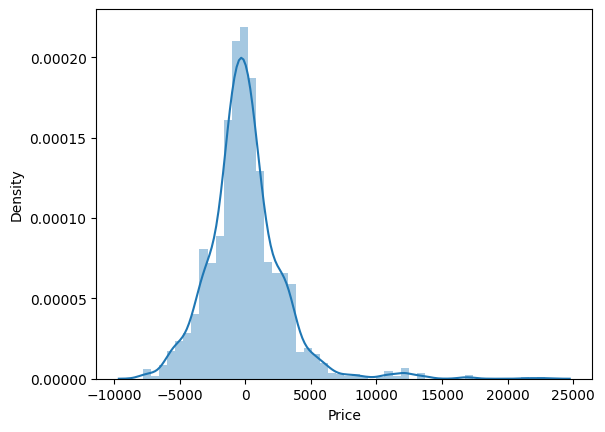

In [77]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_ln)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

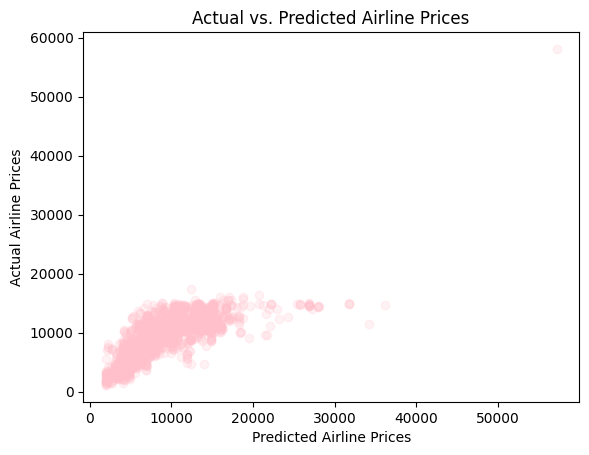

In [78]:
## Plotting Scatter Plot
plt.scatter(y_test,y_ln,alpha =0.2,color="pink")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [79]:
## R square of Linear Regression
rsquare_ln=metrics.r2_score(y_test, y_ln)
rsquare_ln

0.6191755395250379

In [80]:
## Decision Tree Regressor

In [81]:
## Training of the Model 

dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
dt_test = dt.score(X_test, y_test)
dt_train =dt.score(X_train,y_train)
model_metrics(dt)

Training Data score 0.9685095834941612
Testing Data score 0.7112487112149346
MAE is : 1352.3167602558103
MSE is : 6226071.552457885
RMSE is : 2495.20972113726


In [82]:
## Predicting Test Data
y_dt = dt.predict(X_test)
y_dt

array([16840.,  8759.,  9187., ...,  7174., 13339., 14335.])

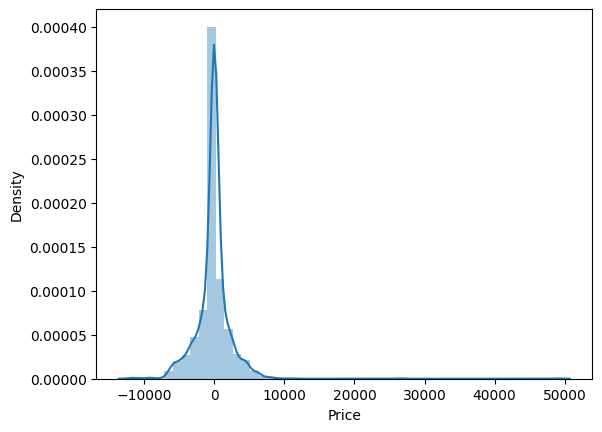

In [83]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_dt)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

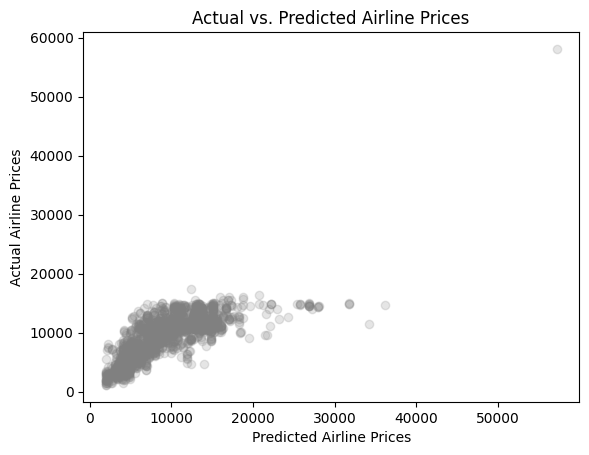

In [84]:
## Plotting Scatter Plot
plt.scatter(y_test,y_ln,alpha =0.2,color="grey")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [85]:
## R square of Decision Tree Regressor
rsquare_dt=metrics.r2_score(y_test, y_dt)
rsquare_dt

0.7112487112149346

In [86]:
## Random Forest Regressor

In [87]:
## Training of Model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_test = rf.score(X_test, y_test)
rf_train =rf.score(X_train,y_train)
model_metrics(rf)

Training Data score 0.9521230724803408
Testing Data score 0.792112440228543
MAE is : 1207.982084334295
MSE is : 4482483.272884705
RMSE is : 2117.1875856628067


In [88]:
## Prediction of Test Data
y_rf = rf.predict(X_test)
y_rf

array([16798.21      ,  5910.8       ,  8916.59      , ...,
        6787.5       , 12956.61166667, 13132.0202619 ])

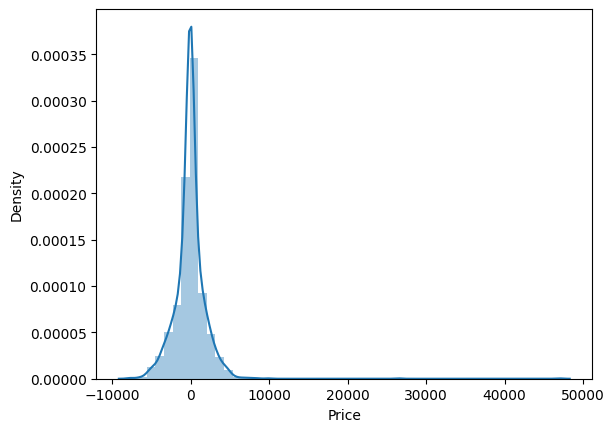

In [89]:
## Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_rf)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

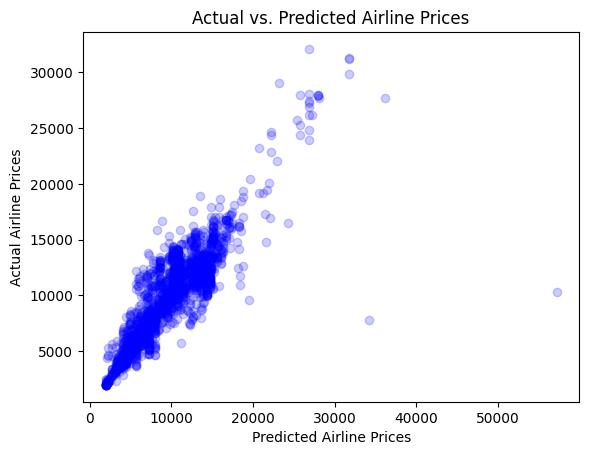

In [90]:
## Scatter plot 
plt.scatter(y_test,y_rf,alpha =0.2,color="Blue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [91]:
## R square of Random Forest Regressor
rsquare_rf=metrics.r2_score(y_test, y_rf)
rsquare_rf

0.792112440228543

In [92]:
## Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [93]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [94]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [95]:
## Training of Model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
## The best estimator across ALL searched params
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [97]:
## The best parameters across ALL searched params
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [98]:
## Printing predicted Test Data
prediction = rf_random.predict(X_test)
prediction

array([17616.85986976,  6172.91137817,  8654.85131831, ...,
        6502.37093466, 12358.90261027, 12609.82610919])

In [99]:
## R Square value of Random Forest Regressor Model After Hyperparameter Tunning
rsquare_htrf=metrics.r2_score(y_test, prediction)
rsquare_htrf

0.809163028651263

In [100]:
## Errors of Random Forest Regressor Model After Hyperparameter Tunning
print("MAE is :" , metrics.mean_absolute_error(y_test,prediction))
print("MSE is :" , metrics.mean_squared_error(y_test,prediction))
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE is : 1190.5398249436305
MSE is : 4114837.5249539153
RMSE is : 2028.5062299519602


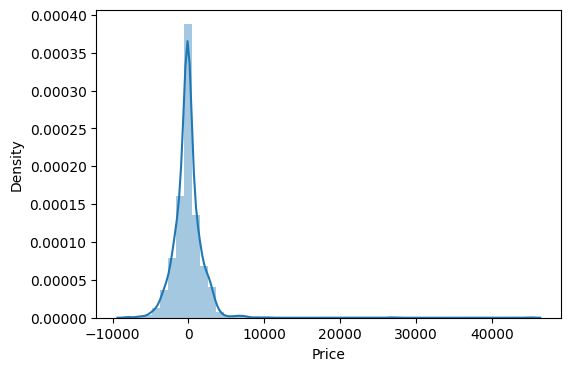

In [101]:
## Error Graph of Tuned Model
plt.figure(figsize = (6,4))
sns.distplot(y_test-prediction)
plt.show()

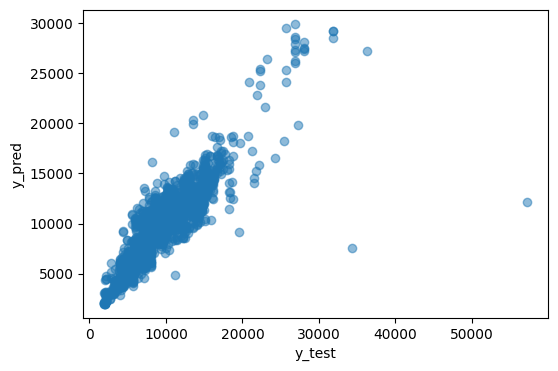

In [102]:
## Scatter plot
plt.figure(figsize = (6,4))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [103]:
## Dataframe of Predicted Price Vs Actual Price
data_test_df = pd.DataFrame({"Predicted Price" : rf.predict(X_test),"Actual Price" : y_test}).reset_index(drop = True)
data_test_df

,Predicted Price,Actual Price
0,16798.210000,16655
1,5910.800000,4959
2,8916.590000,9187
3,3654.420000,3858
4,15192.248333,12898
...,...,...
2132,11951.871667,7408
2133,5056.670000,4622
2134,6787.500000,7452
2135,12956.611667,8824


In [104]:
## Saving The Final Model

In [105]:
# Saving the model

# File to store the data
file = open('rf_flightfare_prediction.pkl', 'wb')

# dumping information to that file
pkl.dump(rf, file)

In [106]:
# open the model
model = open('rf_flightfare_prediction.pkl','rb')
rf_flightfare_prediction = pkl.load(model)

In [107]:
## Prediction
y_predict = rf_flightfare_prediction.predict(X_test)
y_predict

array([16798.21      ,  5910.8       ,  8916.59      , ...,
        6787.5       , 12956.61166667, 13132.0202619 ])

In [108]:
## R Square 
metrics.r2_score(y_test, y_predict)

0.792112440228543

In [109]:
## Adjusted R squares and Errors of models

# Linear Regression
Adjust_r_Ln=1 - (1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
MAE_ln=(metrics.mean_absolute_error(y_test,lr.predict(X_test)))
MSE_ln =(metrics.mean_squared_error(y_test,lr.predict(X_test)))
RMSE_ln=(np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

# Decision Tree Regressor
Adjust_r_dt=1 - (1-rsquare_dt)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
MAE_dt=(metrics.mean_absolute_error(y_test,dt.predict(X_test)))
MSE_dt =(metrics.mean_squared_error(y_test,dt.predict(X_test)))
RMSE_dt=(np.sqrt(metrics.mean_squared_error(y_test,dt.predict(X_test))))

# Random Forest Regressor
Adjust_r_rf=1 - (1-rsquare_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
MAE_rf=(metrics.mean_absolute_error(y_test,rf.predict(X_test)))
MSE_rf =(metrics.mean_squared_error(y_test,rf.predict(X_test)))
RMSE_rf=(np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test))))

# Random Forest Regressor after hyperparameter Tunning 
Adjust_r_htrf=1 - (1-rsquare_htrf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
MAE_htrf=(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)))
MSE_htrf =(metrics.mean_squared_error(y_test,rf_random.predict(X_test)))
RMSE_htrf=(np.sqrt(metrics.mean_squared_error(y_test,rf_random.predict(X_test))))

In [110]:
print("R Square value of Linear regression Model :",((rsquare_ln)*100).round(3),'%')
print("R Square value of Random Forest Regressor Model Before Hyperparameter Tunning :",((rsquare_rf)*100).round(3),'%')
print("R Square value of Random Forest Regressor Model After Hyperparameter Tunning :",((rsquare_htrf)*100).round(3),'%')

R Square value of Linear regression Model : 61.918 %
R Square value of Random Forest Regressor Model Before Hyperparameter Tunning : 79.211 %
R Square value of Random Forest Regressor Model After Hyperparameter Tunning : 80.916 %


In [111]:
## Making a dataframe of r square and adjusted r square values of each model 
Accuracy=pd.DataFrame({'Model Name':['Linear Regression','Decision Tree Regressor','Random Forest Regressor Model Before Hyperparameter Tunning'],'R Square Value':[rsquare_ln,rsquare_dt,rsquare_rf],'Adjusted R square value':[Adjust_r_Ln,Adjust_r_dt,Adjust_r_rf],'Training Data Score':[ln_train,dt_train,rf_train,],'Testing Data Score':[ln_test,dt_test,rf_test]})
Accuracy

,Model Name,R Square Value,Adjusted R square value,Training Data Score,Testing Data Score
0,Linear Regression,0.619176,0.613934,0.623828,0.619176
1,Decision Tree Regressor,0.711249,0.707274,0.968510,0.711249
2,Random Forest Regressor Model Before Hyperpara...,0.792112,0.789251,0.952123,0.792112


In [112]:
## Making a dataframe of r square and adjusted r square values of each model 

Models=pd.DataFrame({'Model Name':['Linear Regression','Decision Tree Regressor','Random Forest Regressor Model Before Hyperparameter Tunning','Random Forest Regressor Model After Hyperparameter Tunning'],'R Square Value':[rsquare_ln,rsquare_dt,rsquare_rf,rsquare_htrf],'Adjusted R square value':[Adjust_r_Ln,Adjust_r_dt,Adjust_r_rf,Adjust_r_htrf],'Mean Absolute Error':[MAE_ln,MAE_dt,MAE_rf,MAE_htrf],'Mean Square Error':[MSE_ln,MSE_dt,MSE_rf,MSE_htrf],'Root Mean Square Error':[RMSE_ln, RMSE_dt,RMSE_rf,RMSE_htrf]})
Models

,Model Name,R Square Value,Adjusted R square value,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,0.619176,0.613934,1972.542785,8.211358e+06,2865.546801
1,Decision Tree Regressor,0.711249,0.707274,1352.316760,6.226072e+06,2495.209721
2,Random Forest Regressor Model Before Hyperpara...,0.792112,0.789251,1207.982084,4.482483e+06,2117.187586
3,Random Forest Regressor Model After Hyperparam...,0.809163,0.806536,1190.539825,4.114838e+06,2028.506230


In [113]:
## Conclusion
# The Random Forest Regressor Model After Hyperparameter Tunning is the best model for Flight Fare Prediction
# The Random Forest Regressor model has best R Square value with less Errors(MAE,MSE,RMSE)
# There is minimal difference between r squares of Random Forest Regressor Model before and after hyperparameter tunning